In [12]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import randint
from scipy.io import loadmat
from scipy import stats
from ucimlrepo import fetch_ucirepo 
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import seaborn as sns

InteractiveShell.ast_node_interactivity = "all"

## Atabey's Notes

- Q1: Nicely done. (33/33)
- Q2: I like your test function. However, the metric for the first part is wrong. (24/33)
- Q3: k-means and LDA are done correctly. However, there is no analysis. (20/33)

# HW1

## Q1

Consider the wheel graph on 7 vertices below. Assume each triangle is equilateral, or use [the graph distance](https://mathworld.wolfram.com/GraphDistance.html).

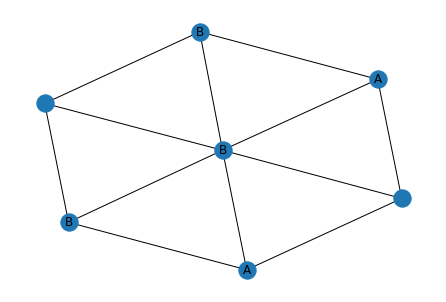

In [2]:
G = nx.wheel_graph(7)
pos = nx.spring_layout(G)
nx.draw(G,pos)
labels = {x: y for x,y in enumerate(['B','A','B','','B','A',''])}
res = nx.draw_networkx_labels(G,pos,labels)

1. Apply the k-NN algorithm by hand with $k=1$ to fill-in the missing labels. You must explain why you gave the specific label.
   
2. This time apply the k-NN by hand again with $k=3$ to fill-in the missing labels. Again, you must explain why you gave the specific label.

3. Apply k-means algorithm by hand with k=2. Use the unlabeled points as the initial centroids.

4. What happens with the central vertex? What are the centroids after the first run? Notice that if we randomly assign the central vertex, it affects the subsequent iterations.

5. Verify that iterations stabilize after first run.

6. What happens if we change the initial centroids? Explain.

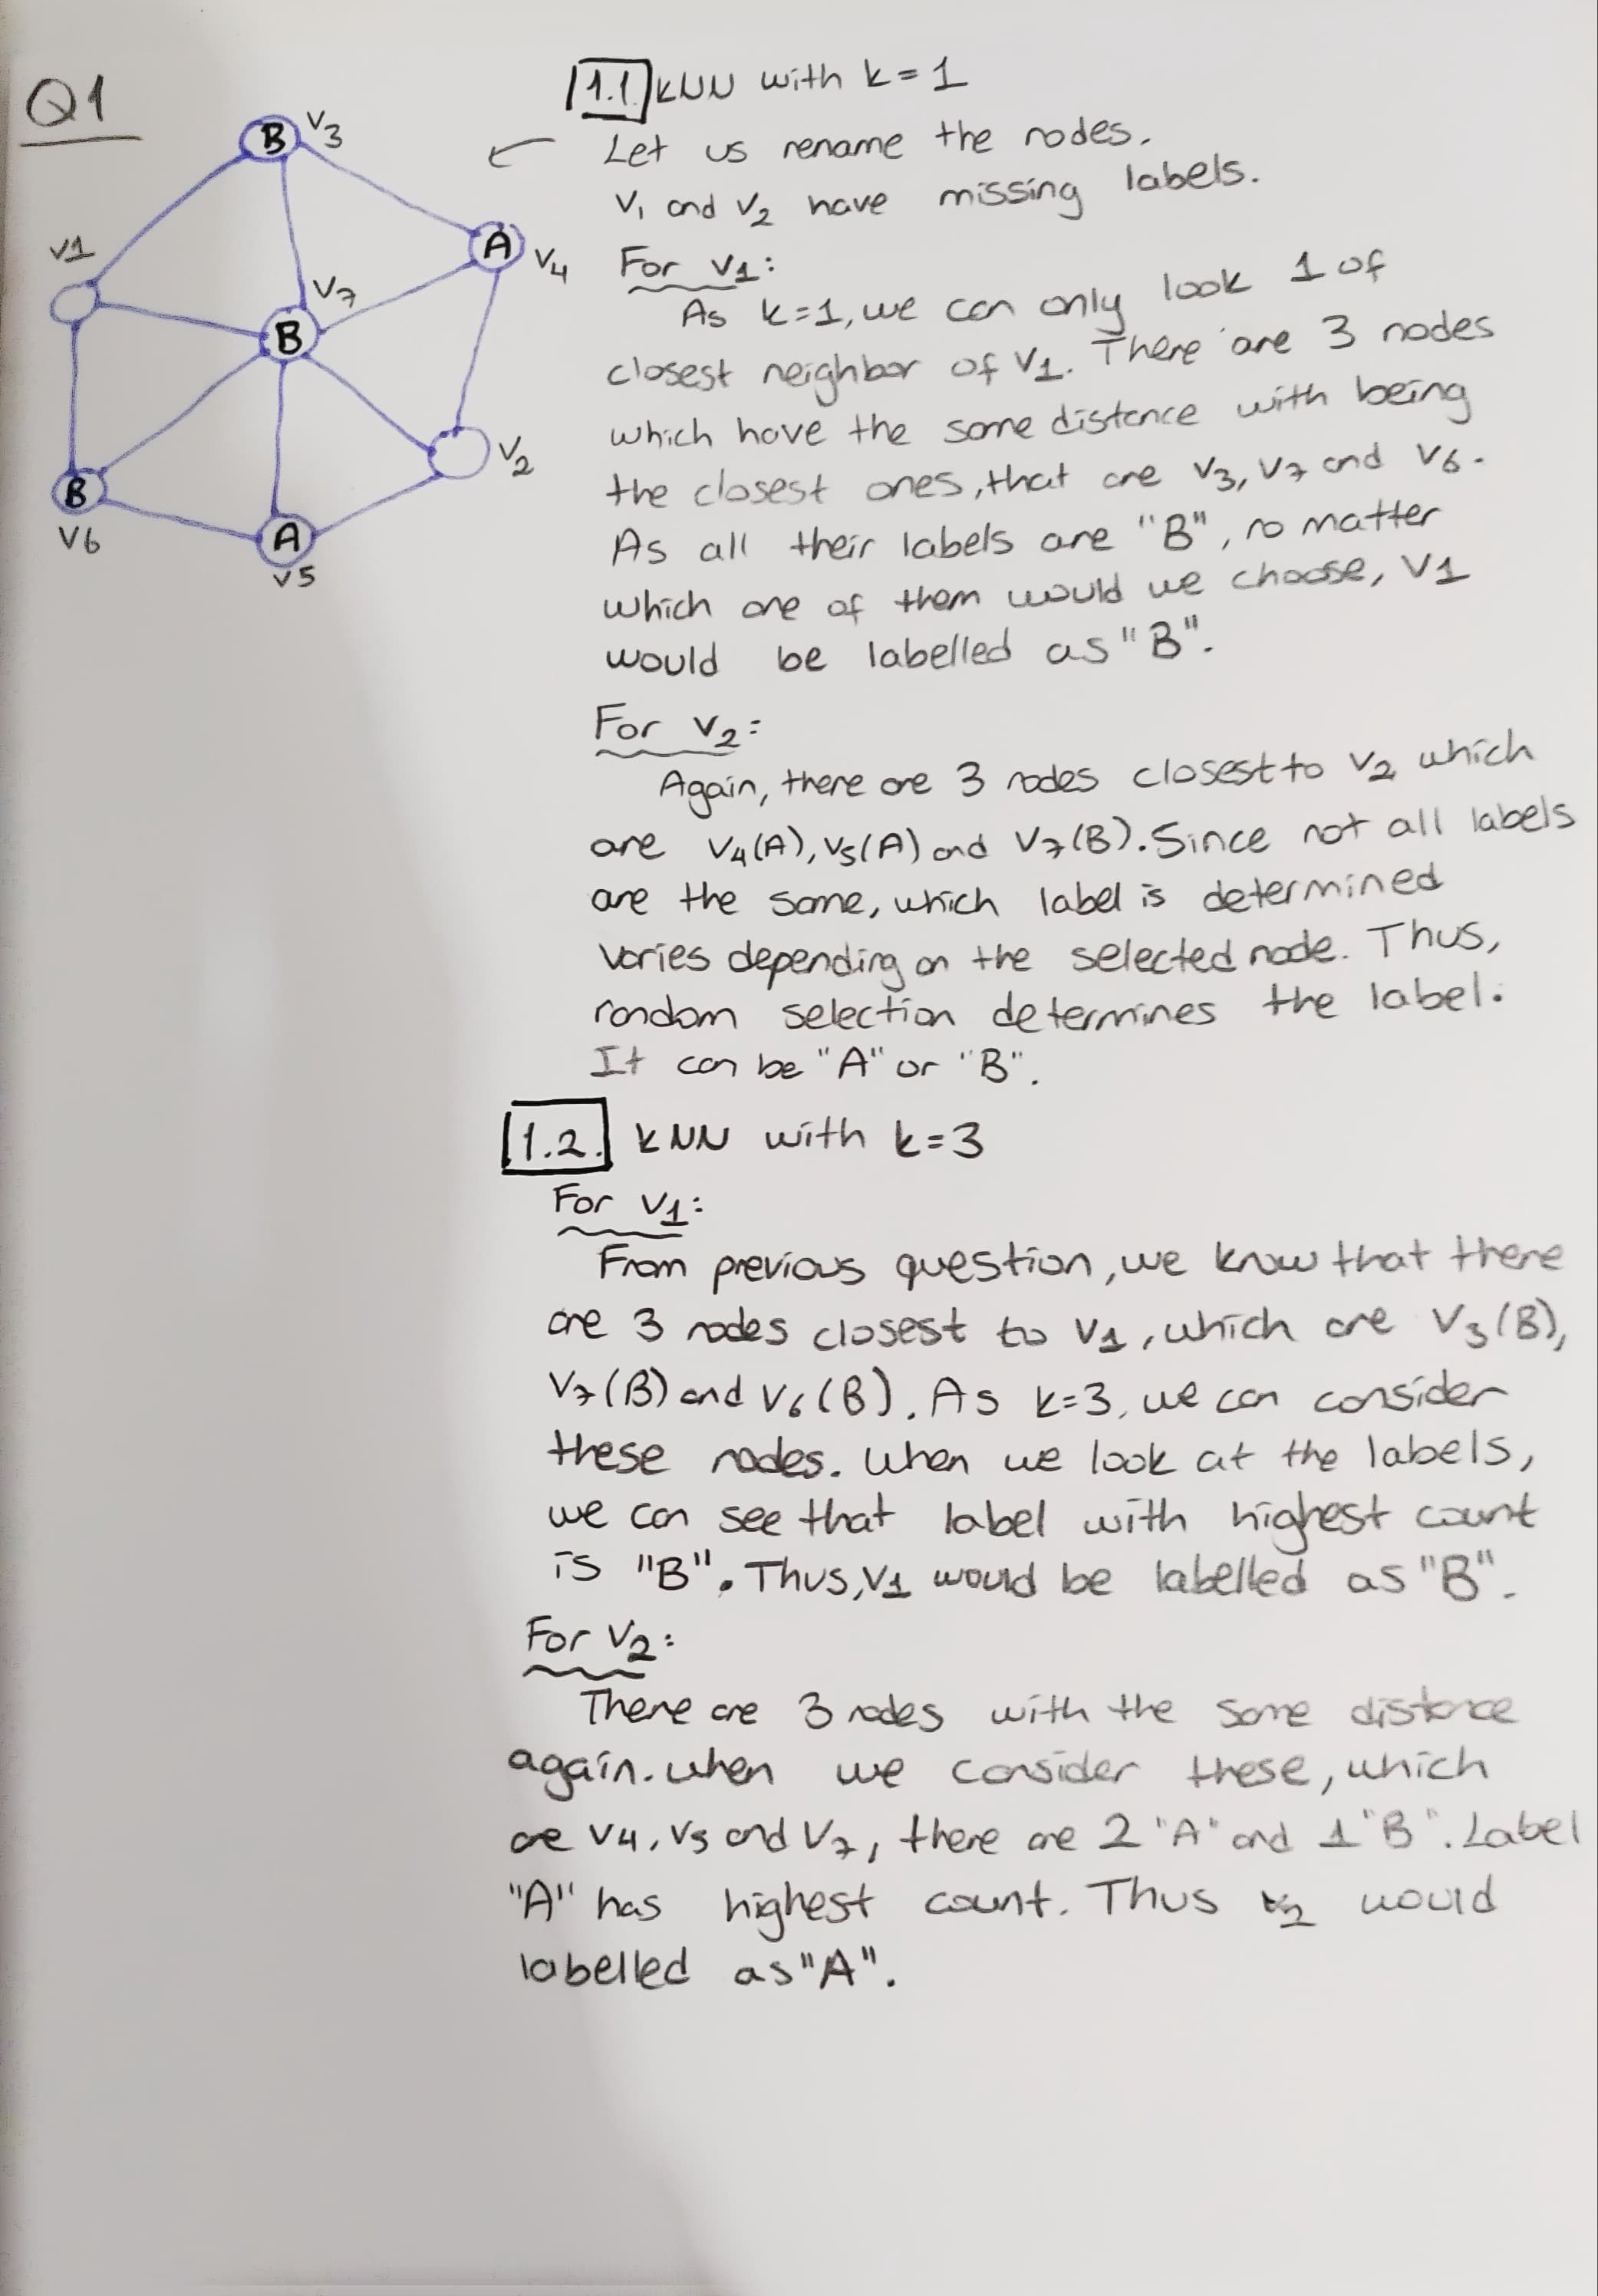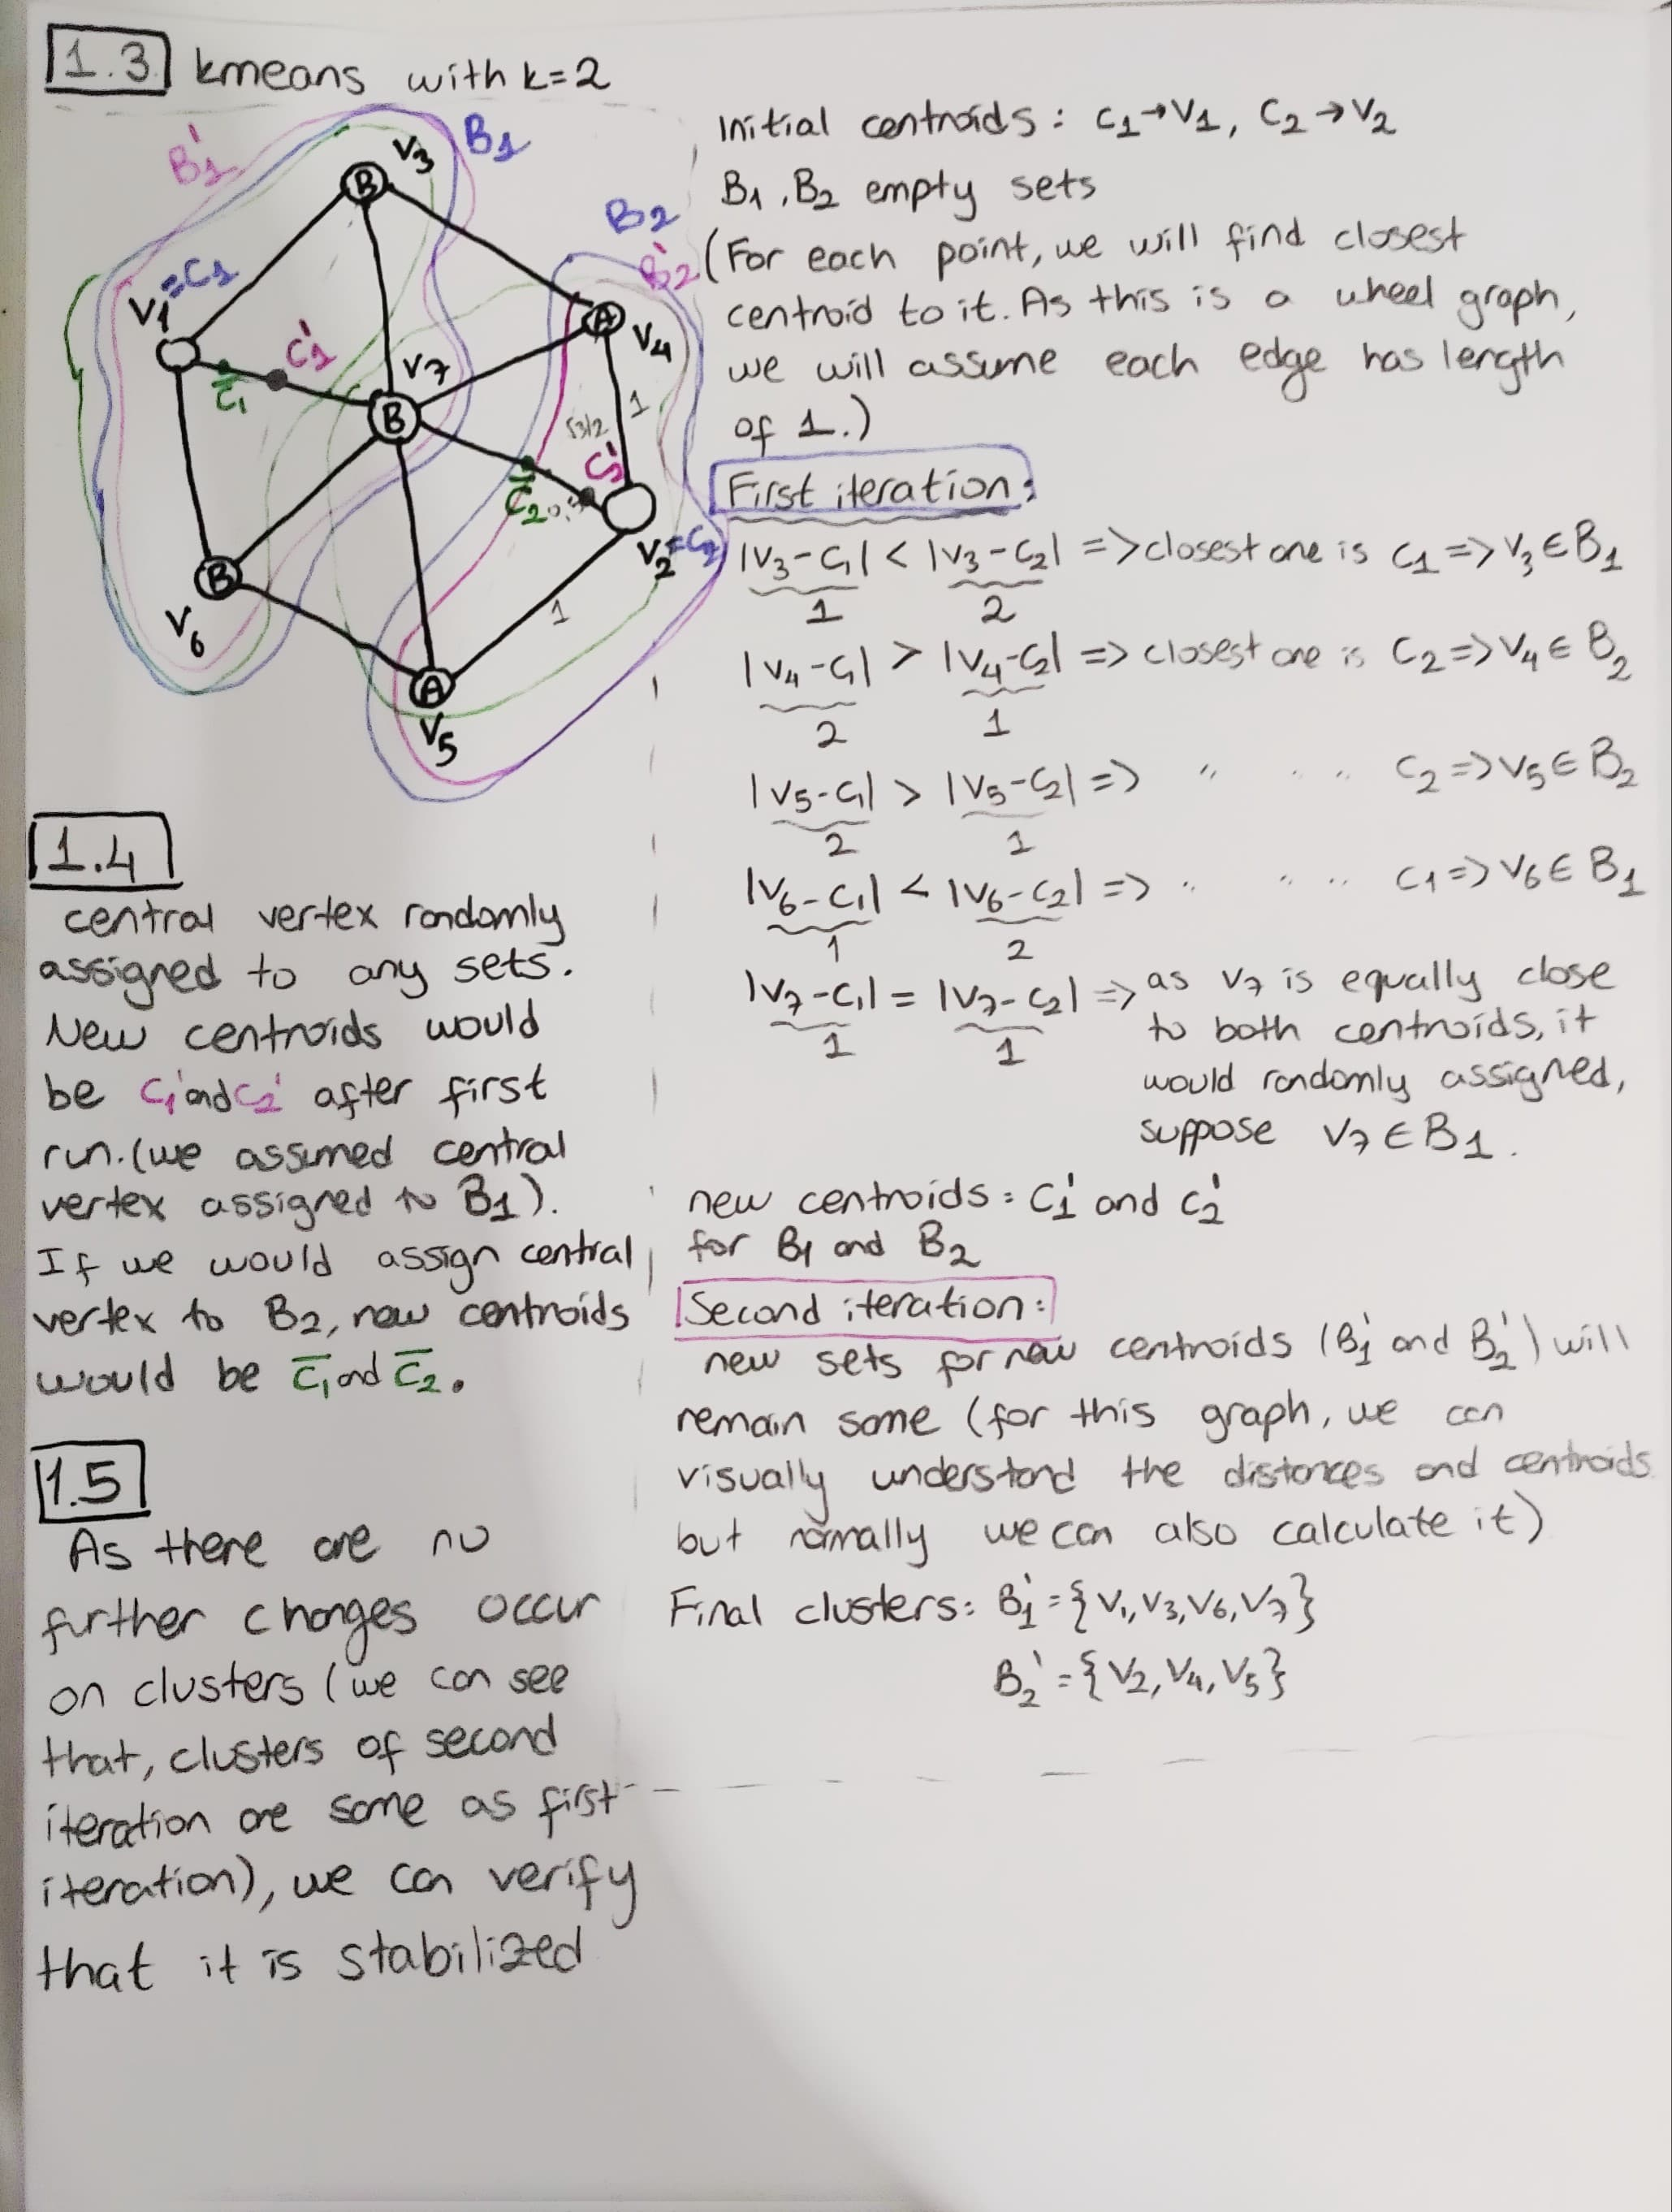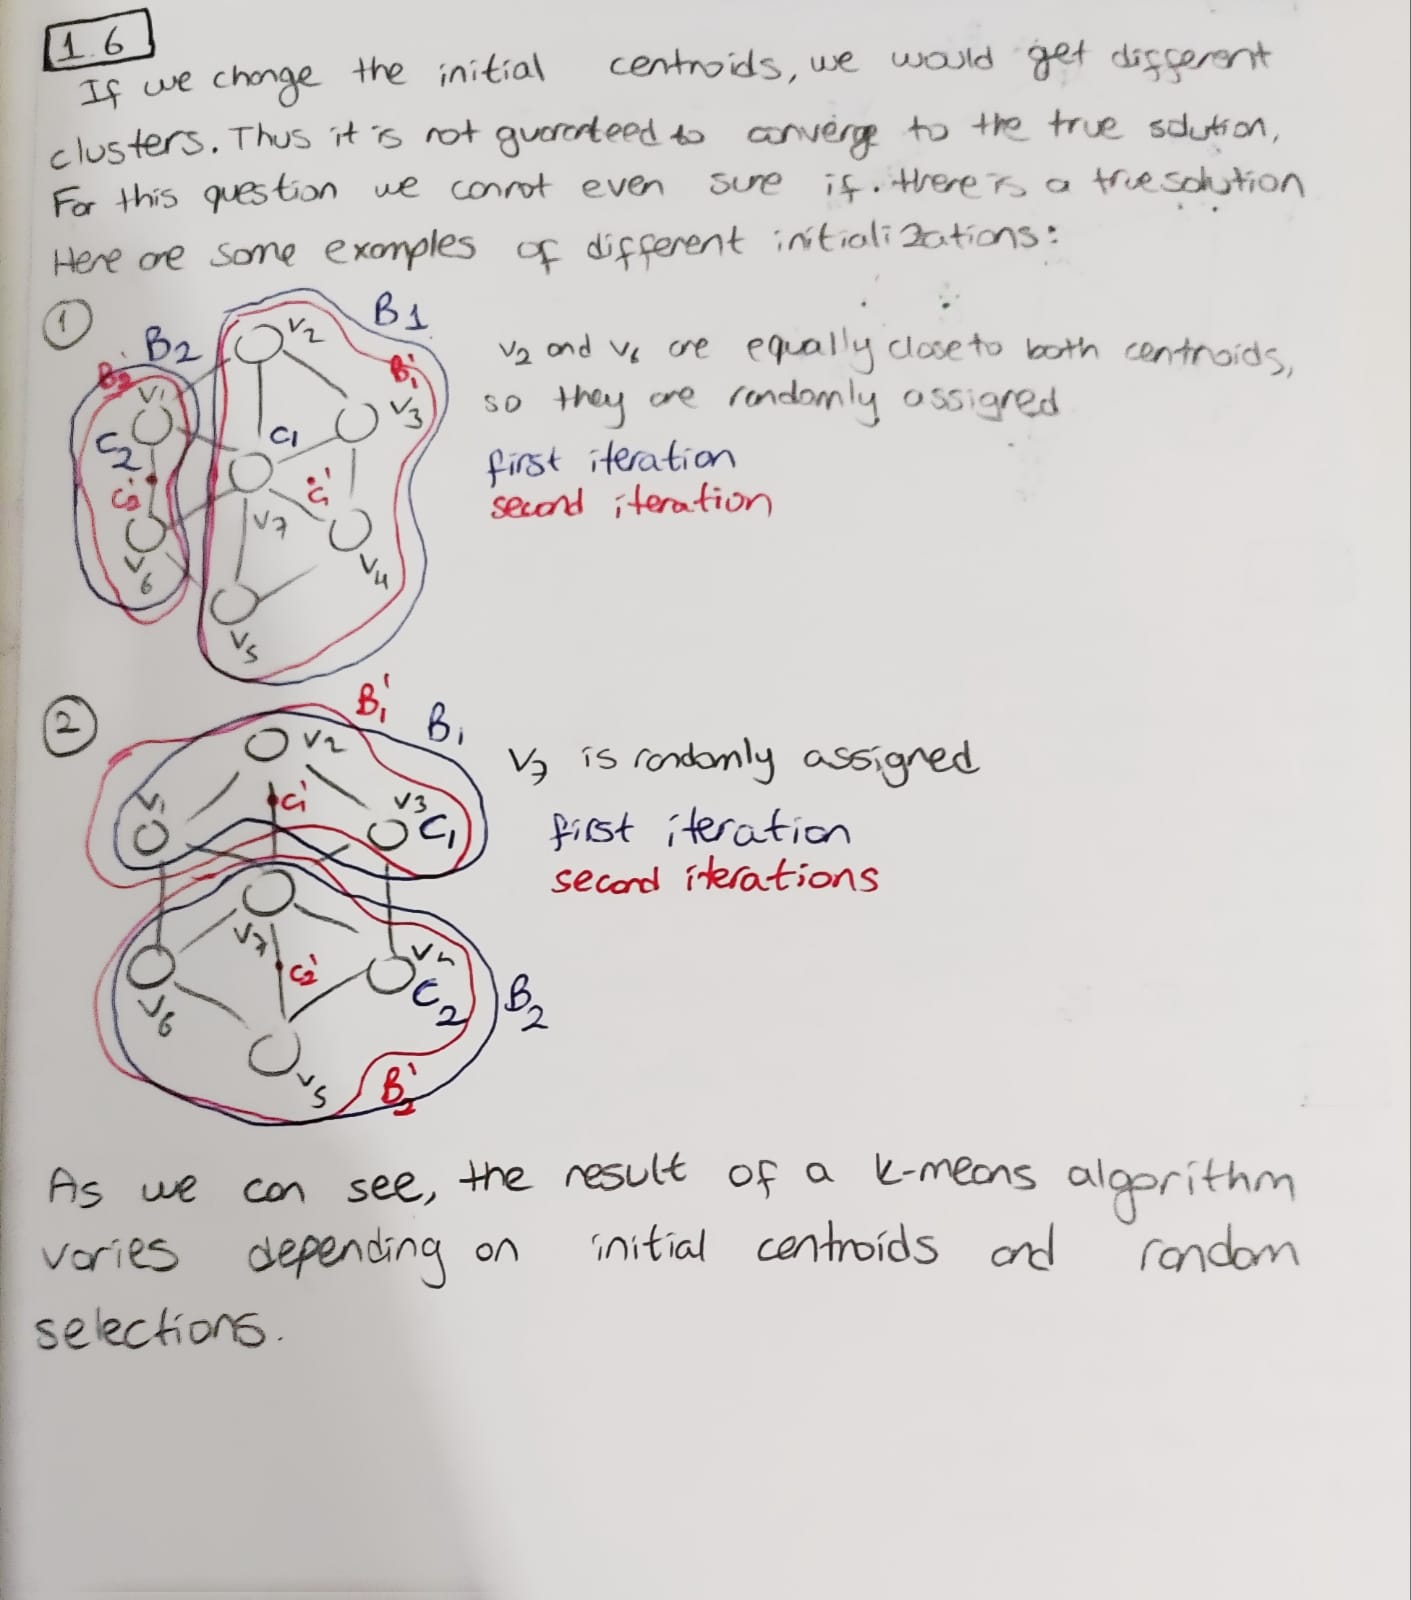

## Q2

Consider the dataset:

In [2]:
image = loadmat(r'C:\Users\user\Desktop\OKUL\BAHAR_23-24\MAT388-Data_Analysis\HW1\PaviaU.mat')['paviaU']
gt = loadmat(r'C:\Users\user\Desktop\OKUL\BAHAR_23-24\MAT388-Data_Analysis\HW1\PaviaU_gt.mat')['paviaU_gt']

The dataset is a hyperspectral image collected by the ROSIS sensor over Pavia, nothern Italy. The image is 610 x 340 pixels, and the number of spectral bands is 103, but some of the samples in the images contain no information and have to be discarded before the analysis. Image groundtruth differentiates 9 classes.

* asphalt (1)
* meadows (2)
* gravel (3)
* trees (4)
* painted metal (5)
* soil (6)
* bitumen (7)
* bricks (8)
* shadows (9)

In [3]:
image.shape
gt.shape

(610, 340, 103)

(610, 340)

Notice that each pixel $(i,j)$ contains a 103-dimensional vector $p_{i,j}$.

In [4]:
i = randint(610)
j = randint(340)
image[i,j]

array([1323, 1178,  995, 1169, 1348, 1368, 1386, 1396, 1357, 1376, 1492,
       1563, 1578, 1532, 1529, 1529, 1560, 1605, 1637, 1672, 1680, 1682,
       1677, 1685, 1724, 1757, 1766, 1780, 1805, 1823, 1822, 1827, 1852,
       1888, 1884, 1891, 1917, 1932, 1941, 1958, 1959, 1943, 1927, 1940,
       1955, 1952, 1961, 1979, 1968, 1930, 1930, 1943, 1938, 1933, 1918,
       1913, 1914, 1903, 1921, 1939, 1925, 1906, 1894, 1922, 1942, 1904,
       1878, 1877, 1893, 1879, 1870, 1883, 1897, 1887, 1845, 1843, 1846,
       1837, 1820, 1807, 1804, 1825, 1838, 1772, 1719, 1732, 1766, 1790,
       1785, 1793, 1773, 1716, 1699, 1702, 1693, 1695, 1721, 1712, 1684,
       1663, 1630, 1574, 1552], dtype=uint16)

We are going to write k-NN models to associate a class label 1 to 9 as above to the pixel in the image, and measure the accuracy of the model.

1. Split the dataset into train and test. Use 90% of the data for training, and the remaining 10% for test. We are going to use *accuracy* which is calculated the ration of the number of correctly labelled points by the total number of pixels.

2. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance
$ d((i,j),(i',j')) = max(|i-i'|,|j-j'|) $. Decide which $k$ yields the best result.

3. Construct k-NN models for $k=1,3,5,7, 9$. For two pixels $(i,j)$ and $(i',j')$ use the distance $d((i,j),(i',j')) = \| p_{i,j} - p_{i',j'} \|$ where $\|\cdot\|$ denotes the Euclidean norm of a vector. Decide which $k$ yields the best results.

In [5]:
gt.shape

(610, 340)

In [6]:
image.shape

(610, 340, 103)

To insert data to model, i need to reshape the data:

In [7]:
image_data = image.reshape(-1, image.shape[-1])
gt_data = gt.flatten()

In [8]:
gt_data.shape
image_data.shape

(207400,)

(207400, 103)

Then, let us remove the zero values

In [9]:
non_zero_indices = np.where(gt_data != 0)[0]
gt_data = gt_data[non_zero_indices]
image_data = image_data[non_zero_indices]

In [10]:
gt_data.shape
image_data.shape

(42776,)

(42776, 103)

As the size of the data is fairly large, as we know the data is labelled, we can use LDA in order to make our model faster

In [13]:
projection = LDA(n_components=2)
transformed = projection.fit_transform(image_data,gt_data)
transformed

array([[ 0.42158325, -3.58483376],
       [-1.849189  , -5.35654446],
       [-1.36142824, -3.05887549],
       ...,
       [ 1.8260298 ,  2.19158262],
       [ 2.29868398,  1.39214994],
       [ 1.17028498,  1.69378417]])

Now, split the data with 9/1

In [14]:
  # Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed, gt_data, test_size=0.1, random_state=42)

Define distance functions:

In [15]:
def chebysev_distance(p1, p2):
  return np.max(np.abs(p1 - p2))

def euclidean_distance(p1, p2):
  return np.linalg.norm(p1 - p2)

Define knn function which creates knn model, predict the label, measure the accuracy and return predictions with accuracy:

In [16]:

def knn_classification(X_train, X_test, y_train, y_test,k, distance_metric):
    # Create and train KNN model
  knn_model = KNN(n_neighbors=k, metric=distance_metric)
  knn_model.fit(X_train, y_train)

  # Predict labels for test set
  y_pred = knn_model.predict(X_test)

  acc=accuracy_score(y_test,y_pred)
  return y_pred,acc



Here are k values, and list which stores the accuracies for different k values:

In [26]:
k_values = [1, 3, 5, 7, 9]
accuracies_chebysev_distance = []
accuracies_euclidean_distance = []

Now for each k value and distance metric, run the classification function in order todetermine best k value with highest accuracy:

In [27]:
# Loop through each k value and construct k-NN models using both distance metrics
for k in k_values:
    # k-NN model using max distance
    cheb_pred,cheb_acc = knn_classification(X_train,X_test,y_train,y_test,k,chebysev_distance)
    print(f"k:{k}--distance:chebysev--accuracy:{cheb_acc}")
    accuracies_chebysev_distance.append(cheb_acc)

    # k-NN model using Euclidean distance
    euc_pred,euc_acc = knn_classification(X_train,X_test,y_train,y_test,k,euclidean_distance)
    print(f"k:{k}--distance:euclidean--accuracy:{euc_acc}")
    accuracies_euclidean_distance.append(euc_acc)

# Find the best k for both distance metrics
best_k_chebysev_distance = k_values[np.argmax(accuracies_chebysev_distance)]
best_k_euclidean_distance = k_values[np.argmax(accuracies_euclidean_distance)]

print("Best k using max distance:", best_k_chebysev_distance)
print("Best k using Euclidean distance:", best_k_euclidean_distance)

k:1--distance:chebysev--accuracy:0.6236559139784946
k:1--distance:euclidean--accuracy:0.6194483403459561
k:3--distance:chebysev--accuracy:0.6813931743805517
k:3--distance:euclidean--accuracy:0.6809256661991585
k:5--distance:chebysev--accuracy:0.6963534361851332
k:5--distance:euclidean--accuracy:0.698223468910706
k:7--distance:chebysev--accuracy:0.707807386629266
k:7--distance:euclidean--accuracy:0.7075736325385694
k:9--distance:chebysev--accuracy:0.7082748948106592
k:9--distance:euclidean--accuracy:0.711781206171108
Best k using max distance: 9
Best k using Euclidean distance: 9


For both distance metrics, as we can see k=9 yields the best result.

Until here, i'm done with question 2, but i wonder what if i take a sample data, and i will try to test properness of my sample. Thank you for your feedback.

In [49]:
X = transformed.copy()
Y = gt_data.copy() 

Y = Y.reshape(-1, 1)

# Concatenate X and Y along axis 1 to merge them
merged_array = np.concatenate((X, Y), axis=1)

# Now merged_array contains X with Y added as an extra column
print("Shape of merged array:", merged_array.shape)

Shape of merged array: (42776, 3)


In [50]:
df_temp=pd.DataFrame(merged_array)
df_temp.head()

,0,1,2
0,0.421583,-3.584834,1.0
1,-1.849189,-5.356544,1.0
2,-1.361428,-3.058875,1.0
3,-0.618263,1.181012,1.0
4,2.098691,-6.836241,1.0


Here, i tried to do sampling, do statistical tests in order to find statistically valid sample

In [53]:
def sample_and_validate(data, continuous_features, sample_size, num_tests=10, alpha=0.05):
    """
    Samples data, conducts statistical tests, and returns validated sample.

    Args:
        data (pd.DataFrame): The original data.
        continuous_features (list): List of continuous feature names.
        sample_size (int): The desired sample size.
        num_tests (int): Number of statistical tests to perform (default: 10).
        alpha (float): Significance level for tests (default: 0.05).

    Returns:
        pd.DataFrame: The validated sample.
    """

    # Choose a sampling method
    sample = data.sample(sample_size)

    # Perform statistical tests
    passed_tests = 0
    for feature in continuous_features:
        for _ in range(num_tests):
            # Draw a random test sample from the original data
            test_sample = data.sample(sample_size)

            # Perform a Kolmogorov-Smirnov test for normality
            test_stat, p_value = stats.ks_2samp(sample[feature], test_sample[feature])

            # Check if p-value is greater than alpha (consider rejecting the null hypothesis)
            if p_value > alpha:
                passed_tests += 1

    # Check if enough tests passed
    if passed_tests / (num_tests * len(continuous_features)) >= 0.8:  # Adjust threshold as needed
        return sample
    else:
        # Retry sampling if tests fail (adjust number of retries as needed)
        for _ in range(2):  # Try up to 2 more times if necessary
            sample = sample_and_validate(data, continuous_features, sample_size, num_tests, alpha)
            if sample is not None:  # Return sample if validation succeeds
                return sample
        print("Failed to generate a statistically valid sample after retries.")
        return None

sample = sample_and_validate(df_temp, [0,1], 5000)

if sample is not None:
    print("Successfully generated a validated sample!")
    print(sample)



Successfully generated a validated sample!
               0         1    2
32696  -0.047492 -1.850590  8.0
13277   1.260848  0.030303  6.0
22643   0.084313 -2.673142  3.0
7815  -14.075578  0.402526  5.0
4220    1.865298  2.081214  2.0
...          ...       ...  ...
26499   0.846706  2.467164  2.0
8388   -0.143563 -3.049368  8.0
29362   1.849635  2.327143  2.0
30546   1.619215  1.780969  2.0
5188   -1.363842 -3.324729  1.0

[5000 rows x 3 columns]


In [57]:
y_data = sample[2]
x_data = sample[[0,1]]
x_data

,0,1
32696,-0.047492,-1.850590
13277,1.260848,0.030303
22643,0.084313,-2.673142
7815,-14.075578,0.402526
4220,1.865298,2.081214
...,...,...
26499,0.846706,2.467164
8388,-0.143563,-3.049368
29362,1.849635,2.327143
30546,1.619215,1.780969


Now, apply the same model with sample data:

In [58]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
accuracies_chebysev_distance2 = []
accuracies_euclidean_distance2 = []
# Loop through each k value and construct k-NN models using both distance metrics
for k in k_values:
    # k-NN model using Chebysev distance
    cheb_pred,cheb_acc = knn_classification(X_train2,X_test2,y_train2,y_test2,k,chebysev_distance)
    print(f"k:{k}--distance:chebysev--accuracy:{cheb_acc}")
    accuracies_chebysev_distance2.append(cheb_acc)

    # k-NN model using Euclidean distance
    euc_pred,euc_acc = knn_classification(X_train2,X_test2,y_train2,y_test2,k,euclidean_distance)
    print(f"k:{k}--distance:euclidean--accuracy:{euc_acc}")
    accuracies_euclidean_distance2.append(euc_acc)

# Find the best k for both distance metrics
best_k_chebysev_distance2 = k_values[np.argmax(accuracies_chebysev_distance2)]
best_k_euclidean_distance2 = k_values[np.argmax(accuracies_euclidean_distance2)]

print("Best k using max distance:", best_k_chebysev_distance2)
print("Best k using Euclidean distance:", best_k_euclidean_distance2)

k:1--distance:chebysev--accuracy:0.662
k:1--distance:euclidean--accuracy:0.66
k:3--distance:chebysev--accuracy:0.734
k:3--distance:euclidean--accuracy:0.732
k:5--distance:chebysev--accuracy:0.738
k:5--distance:euclidean--accuracy:0.73
k:7--distance:chebysev--accuracy:0.748
k:7--distance:euclidean--accuracy:0.744
k:9--distance:chebysev--accuracy:0.752
k:9--distance:euclidean--accuracy:0.764
Best k using max distance: 9
Best k using Euclidean distance: 9


I got the same result with no-sampling version.(but im not sure whether it is a chance or sensible approach)

## Q3

Consider [Individual household electric power consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption) dataset from the UCI data repository:

In [2]:
electric = fetch_ucirepo(id=235)

In [3]:
X = electric['data']['features'].iloc[:,2:]
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
908005,0.168,0.000,240.910,0.600,0.000,0.000,1.0
908006,0.168,0.000,241.110,0.600,0.000,0.000,1.0
908007,0.168,0.000,241.010,0.600,0.000,0.000,0.0
908008,0.168,0.000,241.060,0.600,0.000,0.000,1.0


1. Clean the data. You may replace the missing values with 0.
2. Apply k-means algorithm to the data with $k=2,3,4,5$.
3. Project the data to the 2-dimensional plane using Linear Discriminant Analysis as I did in the class, with the labels you obtained in step 2 above.
4. Inspect the data with the labels you constructed in step 2. Do these clusters have a visible meaning? Analyze.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908010 entries, 0 to 908009
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    908009 non-null  object 
 1   Global_reactive_power  908009 non-null  object 
 2   Voltage                908009 non-null  object 
 3   Global_intensity       908009 non-null  object 
 4   Sub_metering_1         908009 non-null  object 
 5   Sub_metering_2         908009 non-null  object 
 6   Sub_metering_3         904062 non-null  float64
dtypes: float64(1), object(6)
memory usage: 48.5+ MB


From :
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption
we can easily see that all columns are continous variables,thus, we can transform them into float dtype:

In [5]:
df=X.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce') # for problematic values(?), it will set it to Nan instead of error

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908010 entries, 0 to 908009
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    904062 non-null  float64
 1   Global_reactive_power  904062 non-null  float64
 2   Voltage                904062 non-null  float64
 3   Global_intensity       904062 non-null  float64
 4   Sub_metering_1         904062 non-null  float64
 5   Sub_metering_2         904062 non-null  float64
 6   Sub_metering_3         904062 non-null  float64
dtypes: float64(7)
memory usage: 48.5 MB


In [6]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,904062.000000,904062.000000,904062.000000,904062.000000,904062.000000,904062.000000,904062.000000
mean,1.092217,0.119940,239.837872,4.656423,1.180505,1.518586,5.833869
std,1.133100,0.110521,3.332827,4.779530,6.333579,6.451199,8.162384
min,0.076000,0.000000,223.490000,0.200000,0.000000,0.000000,0.000000
25%,0.278000,0.000000,237.800000,1.200000,0.000000,0.000000,0.000000
50%,0.508000,0.102000,240.110000,2.400000,0.000000,0.000000,0.000000
75%,1.530000,0.190000,242.060000,6.400000,0.000000,1.000000,17.000000
max,10.670000,1.390000,252.140000,46.400000,79.000000,78.000000,31.000000


Let us check null values:

In [8]:
df.isna().sum()

Global_active_power      3948
Global_reactive_power    3948
Voltage                  3948
Global_intensity         3948
Sub_metering_1           3948
Sub_metering_2           3948
Sub_metering_3           3948
dtype: int64

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isna().sum().sum()

0

In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,908010.000000,908010.000000,908010.000000,908010.000000,908010.000000,908010.000000,908010.000000
mean,1.087468,0.119419,238.795064,4.636177,1.175373,1.511983,5.808503
std,1.132915,0.110563,16.126905,4.778959,6.320272,6.437934,8.153660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.276000,0.000000,237.760000,1.200000,0.000000,0.000000,0.000000
50%,0.502000,0.100000,240.100000,2.400000,0.000000,0.000000,0.000000
75%,1.526000,0.190000,242.040000,6.400000,0.000000,1.000000,17.000000
max,10.670000,1.390000,252.140000,46.400000,79.000000,78.000000,31.000000


(as LDA doesnt work with 2 components and 2 cluster, i didnt add it to list)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'k = 3')

Text(0.5, 0, 'LD1')

Text(0, 0.5, 'LD2')

<AxesSubplot:>

Text(0.5, 1.0, 'k = 4')

Text(0.5, 0, 'LD1')

Text(0, 0.5, 'LD2')

<AxesSubplot:>

Text(0.5, 1.0, 'k = 5')

Text(0.5, 0, 'LD1')

Text(0, 0.5, 'LD2')

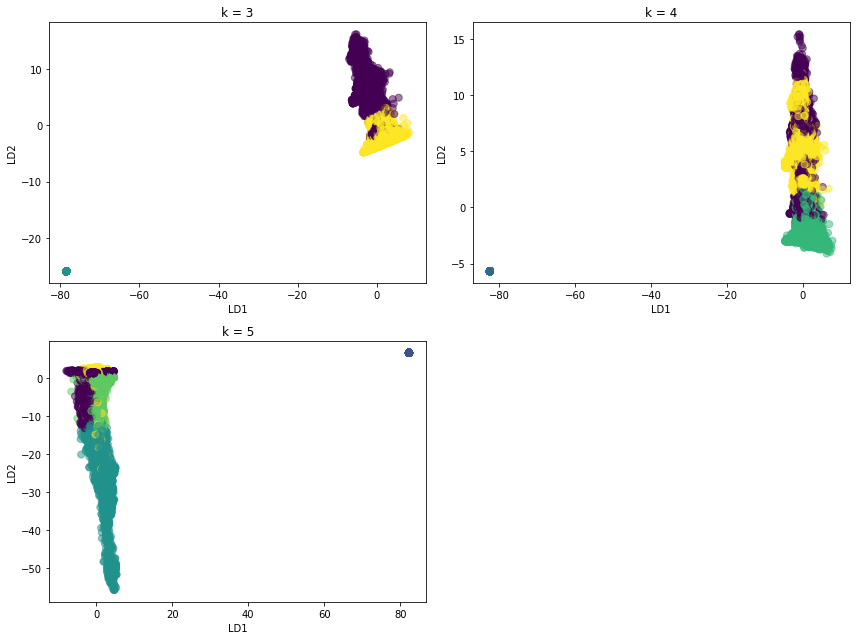

In [22]:
k_values = [3, 4, 5]
kmeans_models = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    kmeans_models.append(kmeans)

lda = LDA(n_components=2)

plt.figure(figsize=(12, 9))

for i, k in enumerate(k_values, start=1):
    plt.subplot(2, 2, i)
    kmeans = kmeans_models[i-1]
    y_kmeans = kmeans.predict(df)
    
    X_lda = lda.fit_transform(df, y_kmeans)
    
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.5)
    plt.title(f'k = {k}')
    plt.xlabel('LD1')
    plt.ylabel('LD2')

plt.tight_layout()
plt.show()

When we look at the visualizations there are specific one cluster which is far away from most of them, probably they are the ones which are 0,in other words missing values or the houses with no one. It looks like k=4 gives the worst result because all the colors mixed together, k=5 looks not bad except upside, k=3 looks best as the clusters are more seperable than others